In [67]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d  
import matplotlib.cm as cm
from matplotlib.colors import Normalize
#%matplotlib notebook

In [68]:
%load_ext autoreload
%autoreload 2
import utils.generators as gs 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [79]:
A, B, X = gs.genrate_matrix(-0.9), gs.genrate_matrix(0.9), gs.genrate_matrix(0.03)
A, B, X

(array([[ 1. , -0.9],
        [-0.9,  1. ]]),
 array([[1. , 0.9],
        [0.9, 1. ]]),
 array([[1.  , 0.03],
        [0.03, 1.  ]]))

In [80]:
xs, y1s, y2s, zs = gs.mesh_surface(limit=3)
len(xs)

10

In [81]:
I = gs.identity_matrix()
I

array([[1, 0],
       [0, 1]])

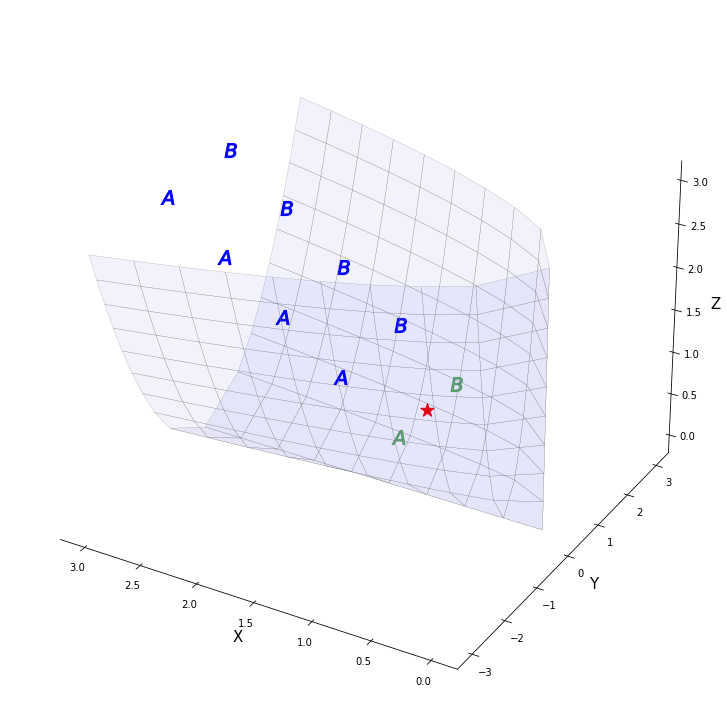

In [90]:
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(projection='3d')

ax.plot_surface(xs, y1s, zs, linewidth=0.2, antialiased=True, color='blue', edgecolor = 'gray', alpha=0.05)
ax.plot_surface(xs, y2s, zs, linewidth=0.2, antialiased=True, color='blue', edgecolor = 'gray', alpha=0.05)
#ax.plot_trisurf(xs, ybs, zs, linewidth=0.2, antialiased=True, color='gray', alpha=0.1)

ax.scatter(*gs.get_field(I), color='r', marker='*', s=200, label=f'I={gs.get_str(I)}')

for s, M in zip(['A','B'],[A,B]):
    ax.scatter(*gs.get_field(M), color='g', marker=f'${s}$', s=200, alpha=0.5)
    for t in np.linspace(0.5, 2, 4):
        ax.scatter(*gs.get_field(M+I*t), color='b', marker=f'${s}$', s=200)


ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
        
ax.invert_xaxis()
ax.set_xlabel('X', fontsize=15)
ax.set_ylabel('Y', fontsize=15)
ax.set_zlabel('Z', fontsize=15)
#plt.legend()            
plt.show()

In [83]:
for t in np.linspace(0, 2, 5):
    print(f'Tau={t}')
    gs.distances_two(A+I*t, B+I*t)
    print('')

Tau=0.0
[[ 1.  -0.9]
 [-0.9  1. ]]
  matrix  euclidean  geodesick
0     AB        1.8       4.16

Tau=0.5
[[ 1.5 -0.9]
 [-0.9  1.5]]
  matrix  euclidean  geodesick
0     AB        1.8       1.96

Tau=1.0
[[ 2.  -0.9]
 [-0.9  2. ]]
  matrix  euclidean  geodesick
0     AB        1.8       1.37

Tau=1.5
[[ 2.5 -0.9]
 [-0.9  2.5]]
  matrix  euclidean  geodesick
0     AB        1.8       1.07

Tau=2.0
[[ 3.  -0.9]
 [-0.9  3. ]]
  matrix  euclidean  geodesick
0     AB        1.8       0.88

